In [ ]:
'''
pythonmath advanced
'''

In [1]:
# measurement.py
"""
Functions to calculate distance between points using different metrics.
"""

import numpy as np

def crow(pointA, pointB):
	"""
	Distance between points A and B "as the crow flies."
		pointA = (x1, y1)
		pointB = (x2, y2)
	returns sqrt( (x2-x1)**2 + (y2-y1)**2 )
	"""
	interval = np.sqrt( (pointA[0] - pointB[0])**2 + \
						(pointA[1] - pointB[1])**2 )
	return interval


def taxicab(pointA, pointB):
	"""
	Distance between points A and B "as the cab drives."
		pointA = (x1, y1)
		pointB = (x2, y2)
	returns |x2-x1| + |y2-y1|
	"""
	interval =	abs(pointB[0] - pointA[0]) + \
				abs(pointB[1] - pointA[1])
	return interval

def distance(pointA, pointB=(0,0), method='taxi'):# =后面是默认值，可以缺损引用
	"""
	Return distance between points A and B. If method is 'taxi', use taxicab
	metric. Otherwise, use Euclidean distance.
		pointA = (x1, y1)
		pointB = (x2, y2)
	"""
	if method == 'taxi':
		return taxicab(pointA, pointB)
	else:
		return crow(pointA, pointB)
    
    

In [2]:
distance((3, 4))

7

In [3]:
distance((1, 2),(4, 6), 'euclid')

5.0

In [4]:
distance((1, 2),(4, 6))

7

In [5]:
help(distance)#调用函数的注释

Help on function distance in module __main__:

distance(pointA, pointB=(0, 0), method='taxi')
    Return distance between points A and B. If method is 'taxi', use taxicab
    metric. Otherwise, use Euclidean distance.
            pointA = (x1, y1)
            pointB = (x2, y2)



In [6]:
distance(pointB = (1, 2), pointA=(4, 6), method='normal')

5.0

In [7]:
# rotate.py
# -------------------------------------------------------------------------
# Define function to rotate a vector in two dimensions.
# ------------------------------------------------------------------------- 
import numpy as np

def rotate_vector(vector, angle):
	"""
	Rotate two-dimensional vector through given angle.
		vector = (x,y)
		angle = rotation angle in radians (counterclockwise)
	Returns the image of vector under rotation as a NumPy array.
	"""
	rotation_matrix = np.array([[ np.cos(angle), -np.sin(angle) ],
								[ np.sin(angle),  np.cos(angle) ]])
	return np.dot(rotation_matrix, vector)


In [9]:
vec = [1, 1]
theta = np.pi/2
r = rotate_vector(vec, theta)
print(r)

[-1.  1.]


In [10]:
x, y = rotate_vector(vec, theta)
print(x, y)

-0.9999999999999999 1.0


In [12]:
_, z = rotate_vector(vec, theta) #_是虚拟变量，不会被保持下来
print(z)

1.0


In [14]:
first, *rest = rotate_vector(vec, theta)#def里星号的意思就是： 收集其余位置的参数，如果不提供任何收集的元素给星号，就是一个空元组。
print(rest)

[1.0]


In [15]:
# -------------------------------------------------------------------------
# Compute and return the cummulative average of an array.
# ------------------------------------------------------------------------- 
import numpy as np

def running_average(x):
	"""
	Return cummulative average of an array.
	"""
	y = np.zeros(len(x))					# empty array to store result
	current_sum = 0.0						# running sum of elements of x
	for i in range(len(x)):
		current_sum += x[i]					# increment sum
		y[i] = current_sum / (i + 1.0)		# update running average
	return y


In [16]:
x = [1, 1, 3, 5,  7, 9]
running_average(x)

array([1.        , 1.        , 1.66666667, 2.5       , 3.4       ,
       4.33333333])

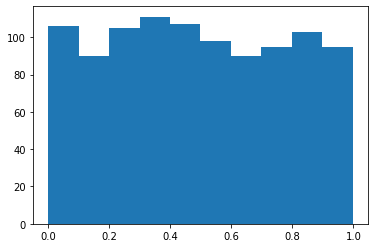

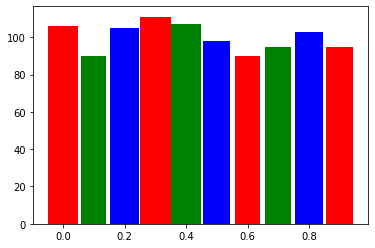

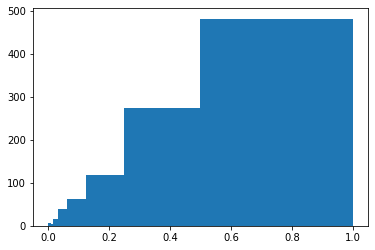

In [18]:
# histogram.py
# -------------------------------------------------------------------------
# Create histograms of random numbers.
# ------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import random as rng

#%%	Generate data and view PyPlot's default histogram.
data = rng(1000)

plt.figure()
plt.hist(data)

#%%	Get binned data from NumPy and make a colorful histogram where the
#	width of each bin is proportional to the number of elements in it.
counts, bin_edges = np.histogram(data)#直方图(Histogram)，又称质量分布图
bin_size = bin_edges[1] - bin_edges[0]
new_widths =  bin_size * counts / counts.max()

plt.figure()
plt.bar(bin_edges[:-1], counts, width=new_widths, color=['r','g','b'])

#%%	Provide logarithmically spaced bin edges rather than using defaults.
log2bins = np.logspace(-8, 0, num=9, base=2)
log2bins[0] = 0.0			# set first bin edge to zero instead of 1/256

plt.figure()
plt.hist(data, bins=log2bins)

plt.show()


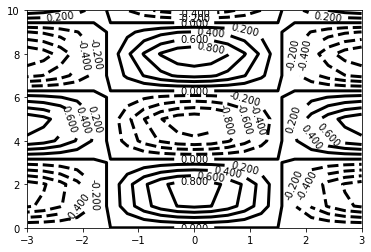

In [19]:
# contour.py
# -------------------------------------------------------------------------
# Create a labeled contour plot.
# ------------------------------------------------------------------------- 
import numpy as np
import matplotlib.pyplot as plt

#%% Create a grid of x and y coordinates
x_vals = np.linspace(-3, 3, 21)
y_vals = np.linspace(0, 10, 11)
X, Y = np.meshgrid(x_vals, y_vals)

#%% Generate function values. 
Z = np.cos(X) * np.sin(Y)

#%% Plot and label contours.
plt.figure()
cs = plt.contour(X, Y, Z, 10, linewidths=3, colors='k')
plt.clabel(cs,fontsize=10)
plt.show()


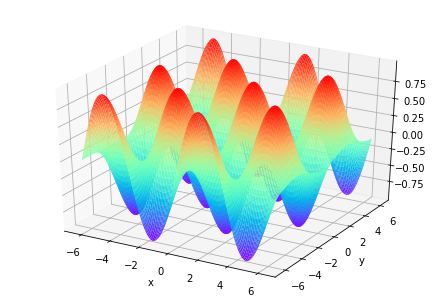

In [27]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
 
fig = plt.figure()
ax = Axes3D(fig)
x=np.arange(-2*np.pi,2*np.pi,0.1)
y=np.arange(-2*np.pi,2*np.pi,0.1)
X, Y = np.meshgrid(x, y)#网格的创建，这个是关键
Z=np.sin(X)*np.cos(Y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()


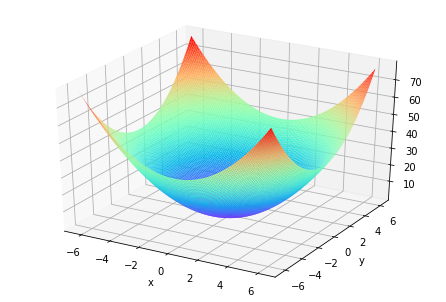

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import pyplot as plt
 
fig = plt.figure()
ax = Axes3D(fig)
x = np.arange(-2*np.pi,2*np.pi,0.1)
y = np.arange(-2*np.pi,2*np.pi,0.1)
X, Y = np.meshgrid(x, y)#网格的创建，这个是关键
Z = X**2 + Y**2
plt.xlabel('x')
plt.ylabel('y')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')
plt.show()
